___
# Step 4 - Working with Databases and SQL
Author: Alexandru Nitulescu
___

### Abstract
In order to work with a SQL database, we first need to create a database and define the structure of our tables. We can then use SQL commands also called queries, to insert data into the tables, query the data to retrieve specific information, and perform other operations as needed.

### Working with SQLite

#### Introduction
One way to store data in a SQL database is to use a SQLite database. SQLite is a lightweight and self-contained database system that can be easily integrated into a data analysis workflow. To store our data in a SQLite database, we first need to establish a connection to the database file using a library like sqlite3 in Python. We can then create tables within the database that correspond to the dataframes we have created.

Once the tables have been created, we can insert our data into the database using SQL commands. It is important to ensure that the datatypes of the columns in the dataframes match the datatypes of the columns in the tables, so that the data is inserted correctly. We can also use SQL commands to retrieve data from the database, perform calculations, and create new tables as needed.

Using a SQL database to store our data can offer several benefits, including improved data organization, faster data retrieval, and the ability to perform complex operations on large datasets. By storing our cleaned and preprocessed data in a database, we can also ensure that our analysis is reproducible and easily shared with others.

##### Analyze the obvious problems
* Describe the problem whenever we insert the data. 
* Mention about creating the tables and its primary keys-

#### 4.1.1 - Importing required packages
We need to make sure we have all the required libraries imported. In this section, we'll be working with SQLite.

In [1]:
import sqlite3
from sqlite3 import Error
import csv

#### 4.1.2 - Creating a database file and connect to it
We need to create a connection to an SQLite database file. If the database file doesn't exist, we will then create one.

In [2]:
def create_connection(db_file: str) -> sqlite3.Connection:
    '''
    Create a connection to an SQLite database file.

    Args:
        db_file (str): Path to the database file.
    Returns:
        conn (sqlite3.Connection): A Connection object representing the database connection.
    '''
    
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(f"Connection with {db_file} is sucessful!")
        return conn
    except Error as e:
        print(e)
    return conn

A Connection object in SQLite is used to manage a connection to a database file. We will be using it in order to execute SQL statements.

However, it is common to create a cursor from the Connection object in order to execute SQL commands on the database. A cursor is an object that allows you to interact with the database by executing SQL commands, fetching data from the database, and managing transactions. To create a cursor in SQLite, you can use the cursor() method of a Connection object.

In [3]:
# Creating a connection with the database file
conn = create_connection("nba.db")

Connection with nba.db is sucessful!


In [4]:
# Create a cursor
cur = conn.cursor()

#### 4.1.3 - Creating the **game_date** table

OBS! SQL queries will from now on stored in string variables indicated by "*q_*".

In [5]:
# Define the SQL statement to create a table named game_dates. "date_id" will be the primary key in this table.
q_create_gamedates_table = '''
    CREATE TABLE IF NOT EXISTS game_dates(
        date_id INTEGER PRIMARY KEY,
        game_date DATE
    );
'''

In [6]:
# Execute the SQL statement to create the table
cur.execute(q_create_gamedates_table)

In [7]:
# Commit the changes to the database
conn.commit()

# Close the cursor and connection to the database
cur.close()
conn.close()

#### 4.1.4 - Insert data into **game_dates** table

In [8]:
# Step 1
conn = create_connection('nba.db')
cur = conn.cursor()

cur.execute("SELECT COUNT(*) FROM game_dates")
q_game_dates_len = cur.fetchone()[0]

# Get the rows that have already been inserted into the database
cur.execute("SELECT game_date FROM game_dates")
q_game_dates = set(row[0] for row in cur.fetchall())

with open("./data/game_dates.csv", 'r') as f:
    game_dates_csv = csv.reader(f, delimiter=";")
    next(game_dates_csv) # Skip header
    
    new_rows = []
    for row in game_dates_csv:
        if row[1] not in q_game_dates:
            new_rows.append(row)

    if q_game_dates_len == 0:
        for row in new_rows:
            cur.execute("INSERT INTO game_dates(date_id, game_date) VALUES (?, ?)", row)
        print("Data has been inserted into the database.")

    elif len(new_rows) == 0:
        print("No new data has been added to the CSV file.")

    else:
        for row in new_rows:
            cur.execute("INSERT INTO game_dates(date_id, game_date) VALUES (?, ?)", row)
        print(f"{len(new_rows)} new rows have been inserted into the database.")

# Commit the changes to the database
conn.commit()

# Close the cursor and connection to the database
cur.close()
conn.close()

Connection with nba.db is sucessful!
No new data has been added to the CSV file.


In [39]:
conn = create_connection('nba.db')
cur = conn.cursor()

cur.execute("SELECT * FROM match_info")
test = cur.fetchall()
print(test[:3])
print(type(test))
print(type(test[0]))

Connection with nba.db is sucessful!
[('10182022GSW', 'GSW', 1, 'W', 48, 123), ('10182022GSW', 'LAL', 1, 'L', 48, 109), ('10182022BOS', 'PHI', 1, 'L', 48, 117)]
<class 'list'>
<class 'tuple'>


#### 4.1.5 - Creating the **match_stats**, **team_info** and **match_results** tables and inserting data

In [9]:
q_create_team_info_table = '''
    CREATE TABLE IF NOT EXISTS team_info(
        team_id TEXT PRIMARY KEY,
        team_name TEXT,
        arena_name TEXT,
        latitude REAL,
        longitude REAL
    );
'''

In [10]:
conn = create_connection('nba.db')
cur = conn.cursor()

cur.execute(q_create_team_info_table)

conn.commit()
cur.close()
conn.close()

Connection with nba.db is sucessful!


In [11]:
# Step 2
conn = create_connection('nba.db')
cur = conn.cursor()

cur.execute("SELECT COUNT(*) FROM team_info")
q_team_info_len = cur.fetchone()[0]

with open("./data/team_info.csv", 'r') as f:
    team_info_csv = csv.reader(f, delimiter=";")
    next(team_info_csv) # Skip header

    if q_team_info_len == 0:
        for row in team_info_csv:
            cur.execute(
                '''
                INSERT INTO team_info(
                team_id, team_name, arena_name, latitude, longitude)
                VALUES(?, ?, ?, ?, ?)
                ''', row)
        print("Data has been inserted into table team_info.")
    else:
        print("The table already contains values.")

conn.commit()
cur.close()
conn.close()

Connection with nba.db is sucessful!
The table already contains values.


In [12]:
q_create_match_info_table = '''
    CREATE TABLE IF NOT EXISTS match_info(
        match_id TEXT,
        team_id TEXT,
        date_id INTEGER,
        result TEXT,
        min INTEGER,
        pts INTEGER,
        PRIMARY KEY (match_id, team_id)
    );
'''

In [13]:
type(q_create_match_info_table)

str

In [14]:
def query_to_db(db_file: str, query: str):
    conn = create_connection(db_file)
    cur = conn.cursor()
    cur.execute(query)
    conn.commit()
    cur.close()
    conn.close()

In [15]:
query_to_db('nba.db', q_create_match_info_table)

Connection with nba.db is sucessful!


In [16]:
# Step 3
conn = create_connection('nba.db')
cur = conn.cursor()

cur.execute("SELECT COUNT(*) FROM match_info")
q_match_info_len = cur.fetchone()[0]

cur.execute("SELECT * FROM match_info")
q_match_info = cur.fetchall()

with open("./data/match_info.csv", 'r') as f:
    match_info_csv = csv.reader(f, delimiter=";")
    next(match_info_csv) 
    
    csv_rows = [(row[0], row[1], int(row[2]), row[3], int(row[4]), int(row[5]))for row in match_info_csv]
    new_rows = []
    new_rows = [row for row in csv_rows if row not in q_match_info]
    
    if q_match_info_len == 0:
        for row in csv_rows:
            cur.execute(
                '''
                INSERT INTO match_info(
                match_id, team_id, date_id, result, min, pts)
                VALUES(?, ?, ?, ?, ?, ?)
                ''', row)
        print("Data has been inserted into the table match_info.")

    elif len(new_rows) == 0:
        print("No new data has been added to the CSV file.")
    
    else:
        for row in new_rows:
            cur.execute(
                '''
                INSERT INTO match_info(
                match_id, team_id, date_id, result, min, pts)
                VALUES(?, ?, ?, ?, ?, ?)
                ''', row)
        print("Data has been inserted into the table match_info.")
        print(f"{len(new_rows)} new rows have been inserted into the database.")

conn.commit()
cur.close()
conn.close()

Connection with nba.db is sucessful!
No new data has been added to the CSV file.


In [17]:
q_create_match_stats_table = '''
    CREATE TABLE IF NOT EXISTS match_stats(
        match_id TEXT,
        team_id TEXT,
        date_id INTEGER,
        fgm INTEGER,
        fga INTEGER,
        fgp REAL,
        tpm INTEGER,
        tpa INTEGER,
        tpp REAL,
        ftm INTEGER,
        fta INTEGER,
        ftp REAL,
        oreb INTEGER,
        dreb INTEGER,
        reb INTEGER,
        ast INTEGER,
        tov INTEGER,
        stl INTEGER,
        blk INTEGER,
        pf INTEGER,
        PRIMARY KEY (match_id, team_id)
    );
'''

In [18]:
query_to_db('nba.db', q_create_match_stats_table)

Connection with nba.db is sucessful!


In [19]:
# Step 3
conn = create_connection('nba.db')
cur = conn.cursor()

cur.execute("SELECT COUNT(*) FROM match_stats")
q_match_stats_len = cur.fetchone()[0]

cur.execute("SELECT * FROM match_stats")
q_match_stats = cur.fetchall()

with open("./data/match_stats.csv", 'r') as f:
    match_stats_csv = csv.reader(f, delimiter=";")
    next(match_stats_csv) 
    
    csv_rows = [(str(row[0]), str(row[1]), int(row[2]), int(row[3]), int(row[4]), float(row[5]),
                int(row[6]), int(row[7]), float(row[8]), int(row[9]), int(row[10]),
                float(row[11]), int(row[12]), int(row[13]), int(row[14]), int(row[15]),
                int(row[16]), int(row[17]), int(row[18]), int(row[19])) for row in match_stats_csv]
    new_rows = []
    new_rows = [row for row in csv_rows if row not in q_match_stats]
    
    if q_match_stats_len == 0:
        for row in csv_rows:
            cur.execute(
                '''
                INSERT INTO match_stats(
                match_id, team_id, date_id, fgm, fga, fgp, tpm, tpa, tpp,
                ftm, fta, ftp, oreb, dreb, reb, ast, tov, stl, blk, pf)
                VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?, ?, ?, ?, ?)
                ''', row)
        print("Data has been inserted into the table match_stats.")

    elif len(new_rows) == 0:
        print("No new data has been added to the CSV file.")
    
    else:
        for row in new_rows:
            cur.execute(
                '''
                INSERT INTO match_stats(
                match_id, team_id, date_id, fgm, fga, fgp, tpm, tpa, tpp,
                ftm, fta, ftp, oreb, dreb, reb, ast, tov, stl, blk, pf)
                VALUES(?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,?, ?, ?, ?, ?,)
                ''', row)
        print("Data has been inserted into the table match_stats.")

        print("Data has been inserted into the table match_stats.")
        print(f"{len(new_rows)} new rows have been inserted into the database.")

conn.commit()
cur.close()
conn.close()

Connection with nba.db is sucessful!
No new data has been added to the CSV file.


### 4.2 - Data analysis using SQL

##### Introduction


In [20]:
import pandas as pd
import sqlite3

In [21]:
conn = sqlite3.connect('nba.db')

In [22]:
q_show_match_stats_table = '''
    SELECT * FROM match_stats
'''

#### General SQL-queries
##### Overview
In this subsection, we will apply some general data insights on the NBA season 2022-23 database we have just created. These queries are designed to provide insight into various aspects of the team perfomance statistics. We will gradually uncover deeper insights and also visualize them.

In [23]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [24]:
# Which team has the highest average points per game (PPG)?
pd.read_sql('''
    SELECT t.team_name, AVG(mi.pts) as PPG
    FROM team_info t
    JOIN match_info mi ON t.team_id = mi.team_id
    GROUP BY t.team_name
    ORDER BY PPG DESC
    LIMIT 1;
''', conn)

,team_name,PPG
0,Sacramento Kings,121.358974


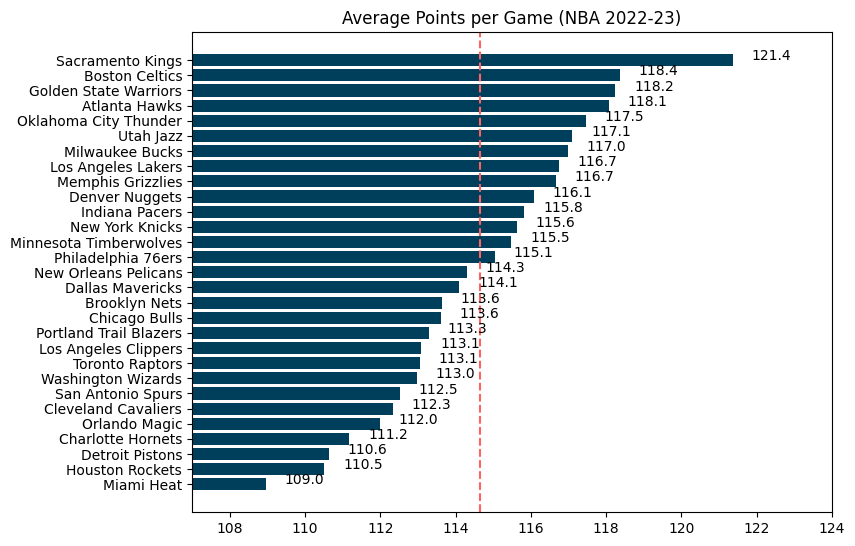

In [25]:
team_ppg = pd.read_sql('''
    SELECT t.team_name, AVG(mi.pts) as ppg
    FROM team_info t
    JOIN match_info mi ON t.team_id = mi.team_id
    GROUP BY t.team_name
    ORDER BY ppg DESC
''', conn)

team_ppg = team_ppg.sort_values('ppg', ascending=True)
avg_ppg = team_ppg['ppg'].mean()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.barh(team_ppg['team_name'], team_ppg['ppg'], color='#003f5c')
plt.xlim([107, 124])
ax.set_title('Average Points per Game (NBA 2022-23)')
ax.axvline(avg_ppg, color="#ff6361", linestyle='--')
for i, v in enumerate(team_ppg['ppg']):
    ax.text(v + 0.5, i, str(round(v, 1)), color='black')
plt.show()

In [26]:
# Which three teams has the highest average field attempted avg(fga)?
pd.read_sql('''
    SELECT t.team_name, AVG(ms.fga) as fga
    FROM team_info t
    JOIN match_stats ms ON t.team_id = ms.team_id
    GROUP BY t.team_name
    ORDER BY fga DESC
    LIMIT 15;
''', conn)

,team_name,fga
0,Oklahoma City Thunder,92.531646
1,Atlanta Hawks,92.500000
2,San Antonio Spurs,92.282051
3,Memphis Grizzlies,91.987179
4,Toronto Raptors,91.320513
5,Charlotte Hornets,90.721519
6,Milwaukee Bucks,90.423077
7,Golden State Warriors,90.177215
8,Indiana Pacers,89.696203
9,Utah Jazz,89.628205


In [27]:
# Which three teams has the highest average field goal percentage (fgp)?
pd.read_sql('''
    SELECT t.team_name, AVG(ms.fgp) as fgp
    FROM team_info t
    JOIN match_stats ms ON t.team_id = ms.team_id
    GROUP BY t.team_name
    ORDER BY fgp DESC
    LIMIT 3;
''', conn)

,team_name,fgp
0,Denver Nuggets,50.619231
1,Sacramento Kings,49.734615
2,Chicago Bulls,49.307692


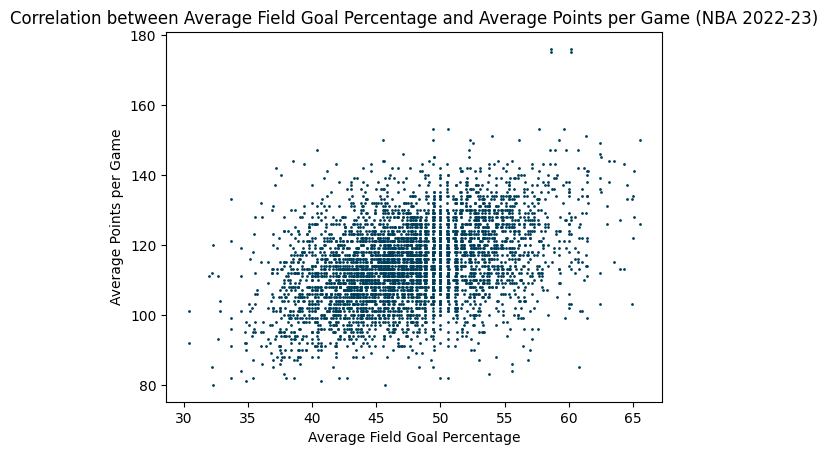

In [28]:
team_ppg_fgp = pd.read_sql('''
    SELECT t.team_name, pts, fgp
    FROM team_info t
    JOIN match_info mi ON t.team_id = mi.team_id
    JOIN match_stats ms ON mi.match_id = ms.match_id
''', conn)
fig, ax = plt.subplots()
ax.scatter(team_ppg_fgp['fgp'], team_ppg_fgp['pts'], color='#003f5c', s=1)
ax.set_xlabel('Average Field Goal Percentage')
ax.set_ylabel('Average Points per Game')
ax.set_title('Correlation between Average Field Goal Percentage and Average Points per Game (NBA 2022-23)')
plt.show()

In [29]:
import plotly.express as px
import plotly.graph_objects as go

In [30]:
team_ppg_fgp = pd.read_sql('''
    SELECT t.team_name, pts, fgp
    FROM team_info t
    JOIN match_info mi ON t.team_id = mi.team_id
    JOIN match_stats ms ON mi.match_id = ms.match_id
''', conn)

fig = go.Figure(go.Histogram2d(
        x=team_ppg_fgp['fgp'],
        y=team_ppg_fgp['pts']
    ))
fig.show()

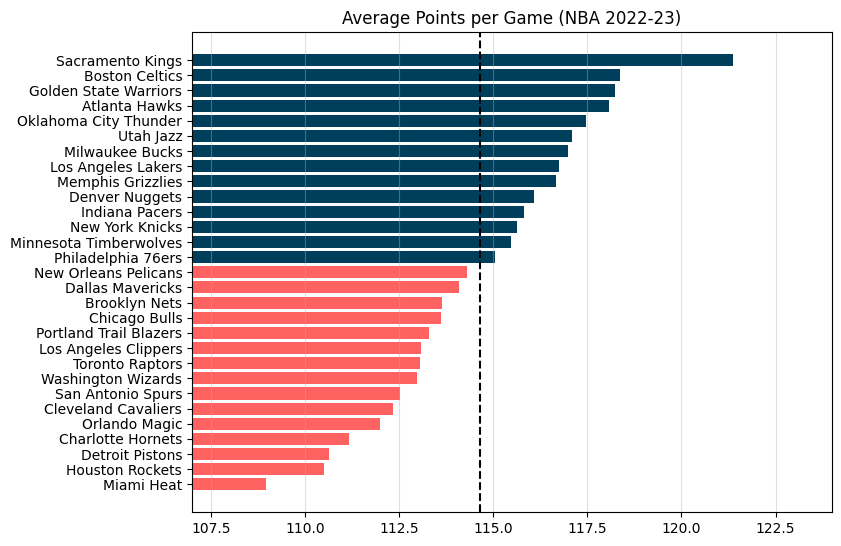

In [153]:
team_ppg = pd.read_sql('''
    SELECT t.team_name, AVG(mi.pts) as ppg
    FROM team_info t
    JOIN match_info mi ON t.team_id = mi.team_id
    GROUP BY t.team_name
    ORDER BY ppg DESC
''', conn)

team_ppg = team_ppg.sort_values('ppg', ascending=True)
avg_ppg = team_ppg['ppg'].mean()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
colors = []
for ppg in team_ppg['ppg']:
    if ppg < avg_ppg:
        colors.append('#ff6361')
    else:
        colors.append('#003f5c')
ax.barh(team_ppg['team_name'], team_ppg['ppg'], color=colors)
plt.xlim([107, 124])
ax.set_title('Average Points per Game (NBA 2022-23)')
ax.axvline(avg_ppg, color="black", linestyle='--')
ax.grid(axis='x', linestyle='-', alpha=0.4)
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=8))
#for i, v in enumerate(team_ppg['ppg']):
#    ax.text(v + 0.5, i, str(round(v, 1)), color='black')
plt.show()

In [32]:
team_ppg = pd.read_sql('''
    SELECT t.team_name, AVG(mi.pts) as ppg
    FROM team_info t
    JOIN match_info mi ON t.team_id = mi.team_id
    GROUP BY t.team_name
    ORDER BY ppg DESC
''', conn)

# Calculate the average PPG
avg_ppg = team_ppg['ppg'].mean()

# Create the plot
fig = px.bar(team_ppg, y='team_name', x='ppg', orientation='h',
             color_discrete_sequence=['#003f5c' if ppg >= avg_ppg else '#ff6361' for ppg in team_ppg['ppg']],
             height=600, width=800)

fig.update_layout(title='Average Points per Game (NBA 2022-23)',
                  xaxis_title='PPG',
                  yaxis_title='',
                  xaxis_tickformat='.1f',
                  yaxis_autorange='reversed',
                  xaxis_range=[108, 122],
                  xaxis_showgrid=True,
                  xaxis_gridcolor='rgba(0, 0, 0, 0.4)',
                  xaxis_ticks='outside',
                  yaxis_showgrid=False,
                  font=dict(size=12))

fig.add_shape(type='line', x0=avg_ppg, y0=0, x1=avg_ppg, y1=len(team_ppg),
              line=dict(color='black', dash='dash'))

fig.show()


In [57]:
tables = pd.read_sql(q_show_match_stats_table, conn)
tables

,match_id,team_id,date_id,fgm,fga,fgp,tpm,tpa,tpp,ftm,fta,ftp,oreb,dreb,reb,ast,tov,stl,blk,pf
0,04022023ATL,ATL,158,51,108,47.2,12,35,34.3,18,22,81.8,16,37,53,28,11,10,3,22
1,04022023CHA,CHA,158,42,85,49.4,15,31,48.4,9,13,69.2,10,27,37,26,18,3,4,11
2,04022023MIL,PHI,158,40,87,46.0,12,36,33.3,12,13,92.3,11,25,36,19,11,3,2,17
3,04022023MIN,POR,158,43,93,46.2,9,30,30.0,12,20,60.0,11,31,42,29,10,12,3,26
4,04022023MIL,MIL,158,46,80,57.5,10,28,35.7,15,21,71.4,7,35,42,28,12,8,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2345,10192022SAS,CHA,2,48,94,51.1,13,29,44.8,20,23,87.0,14,37,51,26,15,7,10,20
2346,10182022BOS,BOS,1,46,82,56.1,12,35,34.3,22,28,78.6,6,30,36,24,11,8,3,24
2347,10182022BOS,PHI,1,40,80,50.0,13,34,38.2,24,28,85.7,4,27,31,16,14,8,3,25
2348,10182022GSW,LAL,1,40,94,42.6,10,40,25.0,19,25,76.0,9,39,48,23,22,12,4,18


In [58]:
atlanta_stats = pd.read_sql('''
    SELECT * 
    FROM match_stats
    WHERE team_id = 'ATL'
''', conn)
atlanta_stats

,match_id,team_id,date_id,fgm,fga,fgp,tpm,tpa,tpp,ftm,fta,ftp,oreb,dreb,reb,ast,tov,stl,blk,pf
0,04022023ATL,ATL,158,51,108,47.2,12,35,34.3,18,22,81.8,16,37,53,28,11,10,3,22
1,03312023BKN,ATL,156,39,91,42.9,8,37,21.6,21,23,91.3,16,30,46,23,11,6,3,14
2,03282023ATL,ATL,153,41,89,46.1,12,27,44.4,26,33,78.8,14,37,51,25,15,5,3,16
3,03262023ATL,ATL,151,45,98,45.9,7,31,22.6,22,26,84.6,14,34,48,27,10,4,5,15
4,03252023ATL,ATL,150,53,96,55.2,15,30,50.0,22,25,88.0,15,27,42,33,13,10,8,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,10282022DET,ATL,11,55,97,56.7,12,29,41.4,14,18,77.8,10,35,45,31,7,5,8,26
74,10262022DET,ATL,9,45,91,49.5,8,22,36.4,20,25,80.0,10,36,46,22,12,6,12,20
75,10232022ATL,ATL,6,39,95,41.1,8,35,22.9,23,28,82.1,16,29,45,23,12,8,9,21
76,10212022ATL,ATL,4,40,89,44.9,13,31,41.9,15,16,93.8,9,37,46,26,17,10,2,22


In [59]:
total_sum = pd.read_sql('''
SELECT match_id, team_id, SUM(pts) as total_pts 
FROM match_info 
GROUP BY match_id, team_id;
''', conn)
total_sum

,match_id,team_id,total_pts
0,01012023DEN,BOS,111
1,01012023DEN,DEN,123
2,01012023MEM,MEM,118
3,01012023MEM,SAC,108
4,01012023MIL,MIL,95
...,...,...,...
2345,12312022OKC,PHI,115
2346,12312022SAS,DAL,126
2347,12312022SAS,SAS,125
2348,12312022UTA,MIA,126


In [60]:
teams_over_100 = pd.read_sql('''
SELECT match_id, team_id, SUM(pts) as total_pts
FROM match_info 
WHERE match_id IN(
    SELECT match_id 
    FROM match_info ms2 WHERE ms2.pts >= 100
    GROUP BY ms2.match_id
    HAVING COUNT(*) = 2
)
GROUP BY match_id, team_id;

''', conn)
teams_over_100

,match_id,team_id,total_pts
0,01012023DEN,BOS,111
1,01012023DEN,DEN,123
2,01012023MEM,MEM,118
3,01012023MEM,SAC,108
4,01022023BKN,BKN,139
...,...,...,...
1929,12312022MIN,MIN,104
1930,12312022SAS,DAL,126
1931,12312022SAS,SAS,125
1932,12312022UTA,MIA,126


In [61]:
high_winrate = pd.read_sql('''
SELECT t.team_name, COUNT(mi.result) AS num_wins, 
       (COUNT(mi.result)*100.0/COUNT(*)) AS win_percentage
FROM team_info t
JOIN match_info mi ON t.team_id = mi.team_id
WHERE mi.result = 'W'
GROUP BY t.team_name
HAVING (COUNT(mi.result)*100.0/COUNT(*)) >= 50
LIMIT 5;

''', conn)
high_winrate

,team_name,num_wins,win_percentage
0,Atlanta Hawks,39,100.0
1,Boston Celtics,54,100.0
2,Brooklyn Nets,43,100.0
3,Charlotte Hornets,26,100.0
4,Chicago Bulls,38,100.0


In [62]:
show_num_occ_1 = pd.read_sql('''
    SELECT team_id, COUNT(*) as num_occurrences
FROM (
    SELECT match_id, team_id, SUM(pts) as total_pts
    FROM match_info 
    WHERE match_id IN(
        SELECT match_id 
        FROM match_info ms2 WHERE ms2.pts >= 120
        GROUP BY ms2.match_id
        HAVING COUNT(*) = 2
    )
    GROUP BY match_id, team_id
)
GROUP BY team_id
ORDER BY num_occurrences DESC
LIMIT 5;

''', conn)

show_num_occ_1

,team_id,num_occurrences
0,SAC,21
1,ATL,20
2,SAS,17
3,IND,17
4,OKC,16


In [84]:
show_num_occ = pd.read_sql('''
SELECT ti.team_name, COUNT(*) as num_occurrences
FROM (
    SELECT ms.match_id, ms.team_id, SUM(ms.pts) as total_pts
    FROM match_info ms
    WHERE ms.match_id IN(
        SELECT ms2.match_id 
        FROM match_info ms2 
        WHERE ms2.pts >= 120
        GROUP BY ms2.match_id
        HAVING COUNT(*) = 2
    )
    GROUP BY ms.match_id, ms.team_id
) as t
JOIN team_info ti ON t.team_id = ti.team_id
GROUP BY t.team_id
ORDER BY num_occurrences DESC
LIMIT 5;


''', conn)

show_num_occ

,team_name,num_occurrences
0,Sacramento Kings,21
1,Atlanta Hawks,20
2,San Antonio Spurs,17
3,Indiana Pacers,17
4,Oklahoma City Thunder,16


In [64]:
import matplotlib.pyplot as plt

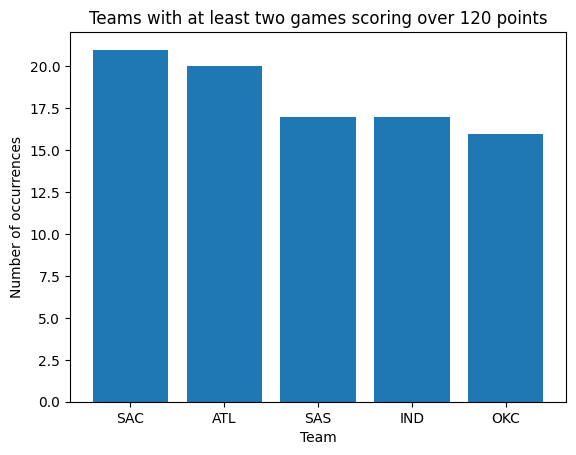

In [79]:
plt.bar(show_num_occ_1['team_id'], show_num_occ_1['num_occurrences'])

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Number of occurrences')
plt.title('Teams with at least two games scoring over 120 points')

# Display the chart
plt.show()

In [66]:
color_palette = {
    '#003f5c': 'dark blue',
    '#7a5195': 'purple',
    '#ef5675': 'pink',
    '#ffa600': 'orange'
    }

In [93]:
team_rbg_avg = pd.read_sql('''
    SELECT t.team_name, AVG(ms.reb) AS avg_rebounds, AVG(ms.ast) as avg_assists
    FROM team_info t
    JOIN match_stats ms ON t.team_id = ms.team_id
    GROUP BY t.team_name
    ORDER BY avg_rebounds DESC;
''', conn)
team_rbg_avg

,team_name,avg_rebounds,avg_assists
0,Milwaukee Bucks,48.756410,25.615385
1,Memphis Grizzlies,46.641026,25.743590
2,New York Knicks,46.569620,22.759494
3,Houston Rockets,46.088608,22.367089
4,Utah Jazz,45.794872,25.833333
5,Los Angeles Lakers,45.602564,25.192308
6,Boston Celtics,45.205128,26.512821
7,Charlotte Hornets,44.556962,25.189873
8,Atlanta Hawks,44.294872,24.794872
9,Golden State Warriors,44.278481,29.594937


In [70]:
highest_pts = pd.read_sql('''
    SELECT match_id, MAX(pts) AS highest_pts
    FROM match_info
''', conn)
highest_pts

,match_id,highest_pts
0,02242023LAC,176


In [85]:
highest_accuray = pd.read_sql('''
SELECT team_id, fga, fgp 
FROM match_stats 
WHERE fga >= 100 AND fgp > 52;
''', conn)
highest_accuray

,team_id,fga,fgp
0,TOR,104,53.8
1,IND,101,52.5
2,SAC,111,58.6
3,ATL,100,56.0
4,GSW,101,54.5
5,MEM,102,54.9
6,TOR,106,53.8


C:\Users\Alex\AppData\Local\Temp\ipykernel_13292\188749711.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(lakers_pts['game_date'], rotation=90)


Text(0.5, 1.0, 'Lakers Points per Game')

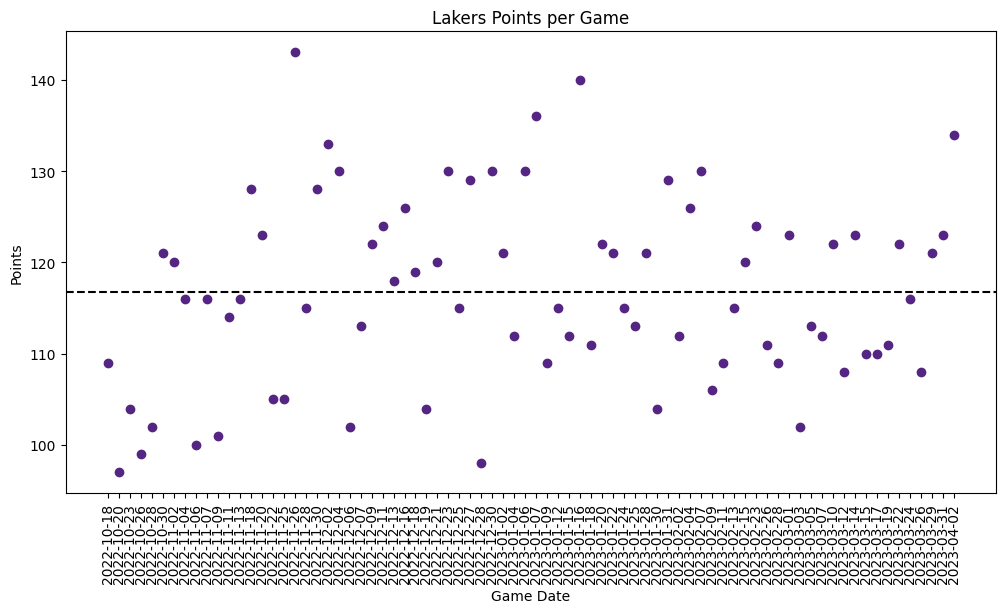

In [90]:
# Get the Lakers' data
lakers_pts = pd.read_sql('''
    SELECT gd.game_date, mi.pts
    FROM match_info mi
    JOIN game_dates gd ON mi.date_id = gd.date_id
    WHERE mi.team_id = 'LAL'
''', conn)

# Calculate the average points
avg_pts = lakers_pts['pts'].mean()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(lakers_pts['game_date'], lakers_pts['pts'], color='#552583')
ax.axhline(y=avg_pts, color='black', linestyle='--')

# Format the x-axis labels
ax.set_xticklabels(lakers_pts['game_date'], rotation=90)

# Add labels and title
ax.set_xlabel('Game Date')
ax.set_ylabel('Points')
ax.set_title('Lakers Points per Game')


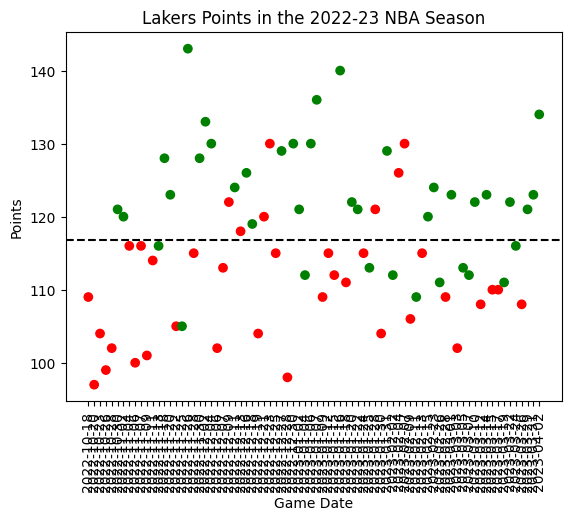

In [91]:
# Query data
lakers_pts_date = pd.read_sql('''
    SELECT gd.game_date, mi.pts, mi.result
    FROM match_info mi
    JOIN game_dates gd ON mi.date_id = gd.date_id
    WHERE mi.team_id = 'LAL'
''', conn)

# Create array of colors based on result
colors = ['green' if result == 'W' else 'red' for result in lakers_pts_date['result']]

# Create scatterplot
plt.scatter(lakers_pts_date['game_date'], lakers_pts_date['pts'], c=colors)

# Add average line
avg_pts = lakers_pts_date['pts'].mean()
plt.axhline(avg_pts, color='black', linestyle='--')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add axis labels and title
plt.xlabel('Game Date')
plt.ylabel('Points')
plt.title('Lakers Points in the 2022-23 NBA Season')
plt.show()
